In [3]:
import networkx as nx
import osmnx as ox
import pandas as pd
import numpy as np
import math
import geopandas as gpd
import folium
from shapely import wkt
import json


C:\Users\Iulia\anaconda3\envs\ox\Lib\site-packages\osmnx\projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [ ]:
gpd.options.use_pygeos = True

In [4]:
%matplotlib inline
ox.__version__

'1.3.0'

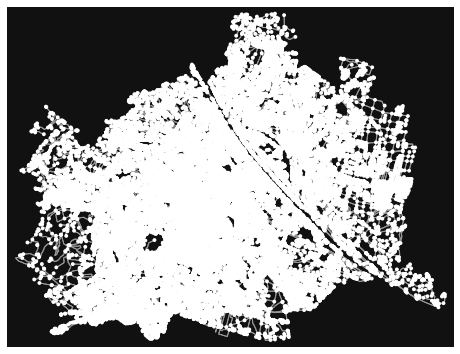

In [3]:
G = ox.graph_from_place("Vienna, Austria", network_type="bike")
fig, ax = ox.plot_graph(G)

In [5]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

510340848.18126124

In [ ]:
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")

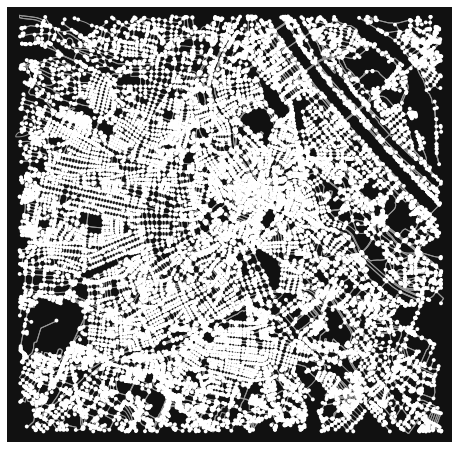

In [3]:
G = ox.graph_from_bbox(48.2494, 48.1572, 16.2975, 16.4380, network_type="bike")
fig, ax = ox.plot_graph(G)

In [4]:
nodes, edges = ox.graph_to_gdfs(G)

In [5]:
nodes, edges

(                     y          x          highway  street_count  ref  \
 osmid                                                                   
 199732       48.208662  16.360136  traffic_signals             4  NaN   
 199735       48.206836  16.355856  traffic_signals             4  NaN   
 199736       48.207697  16.355375              NaN             3  NaN   
 199740       48.214422  16.358265              NaN             4  NaN   
 199744       48.213517  16.357131              NaN             4  NaN   
 ...                ...        ...              ...           ...  ...   
 10720807803  48.176347  16.394384              NaN             3  NaN   
 10720814207  48.176678  16.393862              NaN             3  NaN   
 10726462421  48.162086  16.362275              NaN             3  NaN   
 10734720829  48.244126  16.434813              NaN             4  NaN   
 10748895169  48.241268  16.404144              NaN             3  NaN   
 
                               geome

In [18]:
nodes.to_file('oxnodes.geojson', driver='GeoJSON')

In [17]:
edges.to_file('oxedges.geojson', driver='GeoJSON')

ValueError: Invalid field type <class 'list'>

In [13]:
len(edges)

45910

In [14]:
edges

osmid    highway  oneway reversed  \
u           v          key                                                    
199732      299471980  0               11000070   cycleway   False    False   
            318697385  0               25535788   tertiary   False    False   
            17322939   0               29065909  secondary    True    False   
199735      8946359241 0                4997667   tertiary    True    False   
            33183691   0               25498425  secondary    True    False   
...                                         ...        ...     ...      ...   
10734720829 3598186470 0             1135679748    service   False     True   
            3745593649 0             1154244954    service    True    False   
10748895169 322665789  0             1155847975       path   False     True   
            1670663045 0    [20815846, 8030102]   tertiary   False    False   
            890679344  0                8030102   tertiary   False     True   

                             length  \
u           v          key            
199732      299471980  0     20.509   
            318697385  0     20.372   
            17322939   0    112.736   
199735      8946359241 0      3.473   
            33183691   0     16.389   
...                             ...   
10734720829 3598186470 0     26.302   
            3745593649 0     16.912   
10748895169 322665789  0     17.601   
            1670663045 0    104.337   
            890679344  0    101.581   

                                                                     geometry  \
u           v          key                                                      
199732      299471980  0    LINESTRING (16.36014 48.20866, 16.36019 48.208...   
            318697385  0    LINESTRING (16.36014 48.20866, 16.36005 48.208...   
            17322939   0    LINESTRING (16.36014 48.20866, 16.36016 48.208...   
199735      8946359241 0    LINESTRING (16.35586 48.20684, 16.35590 48.20685)   
            33183691   0    LINESTRING (16.35586 48.20684, 16.35582 48.206...   
...                                                                       ...   
10734720829 3598186470 0    LINESTRING (16.43481 48.24413, 16.43480 48.244...   
            3745593649 0    LINESTRING (16.43481 48.24413, 16.43483 48.244...   
10748895169 322665789  0    LINESTRING (16.40414 48.24127, 16.40423 48.24142)   
            1670663045 0    LINESTRING (16.40414 48.24127, 16.40366 48.241...   
            890679344  0    LINESTRING (16.40414 48.24127, 16.40424 48.241...   

                           lanes                             name maxspeed  \
u           v          key                                                   
199732      299471980  0     NaN                              NaN      NaN   
            318697385  0       3                     Rathausplatz       50   
            17322939   0       3                 Universitätsring       50   
199735      8946359241 0       1                  Schmerlingplatz       30   
            33183691   0       2                  Auerspergstraße       50   
...                          ...                              ...      ...   
10734720829 3598186470 0     NaN                              NaN      NaN   
            3745593649 0     NaN                              NaN      NaN   
10748895169 322665789  0     NaN                              NaN      NaN   
            1670663045 0       2  [Am Donaupark, Donauturmstraße]       50   
            890679344  0       2                  Donauturmstraße       50   

                           tunnel access  ref bridge width service junction  
u           v          key                                                   
199732      299471980  0      NaN    NaN  NaN    NaN   NaN     NaN      NaN  
            318697385  0      NaN    NaN  NaN    NaN   NaN     NaN      NaN  
            17322939   0      NaN    NaN  NaN    NaN   NaN     NaN      NaN  
199735      8946359241 0      NaN    NaN  NaN  

In [15]:
len(nodes)

19432

In [19]:
edges.dtypes

osmid         object
highway       object
oneway          bool
reversed      object
length       float64
geometry    geometry
lanes         object
name          object
maxspeed      object
tunnel        object
access        object
ref           object
bridge        object
width         object
service       object
junction      object
dtype: object

In [20]:
nodes.dtypes

y                float64
x                float64
highway           object
street_count       int64
ref               object
geometry        geometry
dtype: object

In [21]:
type(nodes), type(edges)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [25]:
edges.loc[0, 'osmid']

KeyError: 0

Compiling_02

In [5]:
#find location of trees
tree = ox.geometries_from_place("Vienna, Austria", tags={"natural": "tree"})
tree_row = ox.geometries_from_place("Vienna, Austria", tags={"natural": "tree_row"})


In [6]:
#project tree locations
tree_proj = tree['geometry'].to_crs(3857)
tree_row_proj = tree_row['geometry'].to_crs(3857)

In [7]:
G = ox.graph_from_place("Vienna, Austria", network_type="bike")

In [8]:
nodes, edges = ox.graph_to_gdfs(G)

In [9]:
edges_proj = edges['geometry'].to_crs(3857)

In [10]:
edges_proj_buffer = edges_proj.buffer(10)
within = edges_proj.apply(lambda edges_proj: edges_proj_buffer.contains(tree_proj[0]))
within.describe()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Iulia\anaconda3\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Iulia\AppData\Local\Temp\ipykernel_10280\2730230645.py", line 2, in <module>
    within = edges_proj.apply(lambda edges_proj: edges_proj_buffer.contains(tree_proj[0]))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Iulia\anaconda3\envs\ox\Lib\site-packages\geopandas\geoseries.py", line 645, in apply
    result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Iulia\anaconda3\envs\ox\Lib\site-packages\pandas\core\series.py", line 4771, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

In [ ]:
#Spatial Index of nodes
from shapely.geometry import Point
from shapely.geometry import LineString

#Convert the graph nodes to shapely points (don't need this part becasue we are finding nearest points to line instead of point to point)

Points_from_lines = gpd.GeoSeries(gpd.points_from_xy(list(edges_proj.centroid.x),list(edges_proj.centroid.y)))

#create a dictionary that (key:value) = (Point spatialIndex : Node osmid)

edges_uvkey=list(edges.index) #list of edge indicies in osmnx graph
Points_spatialindex=list(Points_from_lines.index)  #list of created points spatial indicies

osmId_spatialIndex={}
[osmId_spatialIndex.update({i:j}) for i,j in zip(Points_spatialindex,edges_uvkey)]
len(edges_uvkey)


Citybikes API

In [1]:
# Import necessary modules

import requests
import pandas as pd
import plotly.express as px
import datetime

In [2]:
city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

In [3]:
def get_city_data(city):

  city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

  list_of_dicts = []
  for city_bike_dict in city_bike_networks['networks']:
      new_city = city_bike_dict['location']['city']
      if new_city.lower() == city.lower():
          list_of_dicts.append(city_bike_dict)

  return list_of_dicts

In [4]:
get_city_data("Wien")

[{'company': ['Nextbike GmbH'],
  'href': '/v2/networks/wienmobil-rad',
  'id': 'wienmobil-rad',
  'location': {'city': 'Wien',
   'country': 'AT',
   'latitude': 48.2081743,
   'longitude': 16.3738189},
  'name': 'WienMobil Rad'}]

In [5]:
def get_stations_info(city):

    station_dict = get_city_data(city)
    if not station_dict:
        print("Error: No bike company found for {}".format(city))
        return None

    network_address = station_dict[0]['href']
    url = "http://api.citybik.es/{}".format(network_address)
    return requests.get(url).json()['network']['stations']

In [6]:
city = "Wien"
station_info = get_stations_info(city)

In [7]:
def get_available_stations(city = "Wien"):
    '''
    Takes in the city name and returns a pandas dataframe containing information about the city
    Default city name is Wien
    '''
    station_info = get_stations_info(city)

    station_list = []
    for info in station_info:

        a_dict = {
            'Station Name': info['name'],
            'empty_slots' : info['empty_slots'],
            'free_bikes' : info['free_bikes'],
            'latitude' : info['latitude'],
            'longitude' : info['longitude'],
            'timestamp' : info['timestamp'],
            'Unique ID': info['extra']['uid'],
        }
        station_list.append(a_dict)

    return pd.DataFrame(station_list)

In [8]:
available_stations = get_available_stations(city = "Wien")
len(available_stations), available_stations

(231,
                        Station Name  empty_slots  free_bikes   latitude  \
 0                 Julius-Raab-Platz          4.0          13  48.211544   
 1                       Hoher Markt          8.0          17  48.210666   
 2                              Oper          6.0          15  48.202683   
 3                       Volksgarten          0.0          18  48.206516   
 4                    Taborstraße U2          7.0          16  48.219522   
 ..                              ...          ...         ...        ...   
 226                   Johnstrasse U         11.0          11  48.198340   
 227                  Kutschkergasse          0.0          17  48.225707   
 228                    Brückengasse         14.0           8  48.191260   
 229                       Stadion U          8.0          13  48.210893   
 230  Praterstern Ausstellungsstraße         14.0          11  48.217850   
 
      longitude                    timestamp  Unique ID  
 0    16.382374  2023-

In [9]:
import geopandas

In [10]:
gdf = geopandas.GeoDataFrame(
    available_stations, geometry=geopandas.points_from_xy(available_stations.longitude, available_stations.latitude)
)

In [11]:
gdf

,Station Name,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID,geometry
0,Julius-Raab-Platz,4.0,13,48.211544,16.382374,2023-03-11T21:47:00.521000Z,68577704,POINT (16.38237 48.21154)
1,Hoher Markt,8.0,17,48.210666,16.372983,2023-03-11T21:47:00.545000Z,68577989,POINT (16.37298 48.21067)
2,Oper,6.0,15,48.202683,16.369702,2023-03-11T21:47:00.546000Z,68578292,POINT (16.36970 48.20268)
3,Volksgarten,0.0,18,48.206516,16.360400,2023-03-11T21:47:00.547000Z,68578979,POINT (16.36040 48.20652)
4,Taborstraße U2,7.0,16,48.219522,16.382218,2023-03-11T21:47:00.549000Z,68579972,POINT (16.38222 48.21952)
...,...,...,...,...,...,...,...,...
226,Johnstrasse U,11.0,11,48.198340,16.318975,2023-03-11T21:47:00.915000Z,120667066,POINT (16.31897 48.19834)
227,Kutschkergasse,0.0,17,48.225707,16.344196,2023-03-11T21:47:00.917000Z,136959192,POINT (16.34420 48.22571)
228,Brückengasse,14.0,8,48.191260,16.347918,2023-03-11T21:47:00.930000Z,141457598,POINT (16.34792 48.19126)
229,Stadion U,8.0,13,48.210893,16.420795,2023-03-11T21:47:00.929000Z,140182214,POINT (16.42079 48.21089)


In [13]:
gdf.to_file('bike_stations.geojson', driver='GeoJSON')

In [12]:
#Use ploty to show the locations on a map of stations in the city selected earlier

ACCESS_MAP_TOKEN = "pk.eyJ1IjoiYWpvc2VndW4iLCJhIjoiY2t3NnVlZXVrMDIyZjJ1cW1wY2lraGpscSJ9.iPudHyKbx7WXazNrcPH1rA"

In [ ]:
def show_map(station_data):
    '''
    Takes in data of the station info in a dataframe format

    Shows a map
    '''

    ## Get the current date and time
    current_date = pd.to_datetime(station_data['timestamp'][0]).strftime('%a %d %B, %Y at %H:%M')

    map_title = 'Map Showing Number of Bikes in {} at {}'.format(city, current_date)


    # Get access token from ploty
    px.set_mapbox_access_token(ACCESS_MAP_TOKEN)

    fig = px.scatter_mapbox(station_data, lat="latitude", lon="longitude", hover_name="Station Name", color="free_bikes",
                            hover_data=["empty_slots", "free_bikes"],
                             title=map_title,
                              color_continuous_scale=px.colors.sequential.Plasma, size_max=20,zoom=12)


    fig.show()

In [ ]:
show_map(available_stations)

In [14]:
available_stations['timestamp'] = pd.to_datetime(available_stations['timestamp'][0]).strftime('%a %d %B, %Y at %H:%M')

In [15]:
available_stations

,Station Name,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID,geometry
0,Julius-Raab-Platz,4.0,13,48.211544,16.382374,"Sat 11 March, 2023 at 21:47",68577704,POINT (16.38237 48.21154)
1,Hoher Markt,8.0,17,48.210666,16.372983,"Sat 11 March, 2023 at 21:47",68577989,POINT (16.37298 48.21067)
2,Oper,6.0,15,48.202683,16.369702,"Sat 11 March, 2023 at 21:47",68578292,POINT (16.36970 48.20268)
3,Volksgarten,0.0,18,48.206516,16.360400,"Sat 11 March, 2023 at 21:47",68578979,POINT (16.36040 48.20652)
4,Taborstraße U2,7.0,16,48.219522,16.382218,"Sat 11 March, 2023 at 21:47",68579972,POINT (16.38222 48.21952)
...,...,...,...,...,...,...,...,...
226,Johnstrasse U,11.0,11,48.198340,16.318975,"Sat 11 March, 2023 at 21:47",120667066,POINT (16.31897 48.19834)
227,Kutschkergasse,0.0,17,48.225707,16.344196,"Sat 11 March, 2023 at 21:47",136959192,POINT (16.34420 48.22571)
228,Brückengasse,14.0,8,48.191260,16.347918,"Sat 11 March, 2023 at 21:47",141457598,POINT (16.34792 48.19126)
229,Stadion U,8.0,13,48.210893,16.420795,"Sat 11 March, 2023 at 21:47",140182214,POINT (16.42079 48.21089)
